# Set Up

In [75]:
# Install plotly: !pip install --user plotly

In [76]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import random
import math
%matplotlib inline

from os import path, getcwd
from glob import glob

code_dir = getcwd()
data_dir = path.expanduser('~/data/workshop-content18/3-snc/data/')

ais_pathnames = glob(data_dir + '*.txt')
ais_basenames = [path.basename(pn) for pn in ais_pathnames]

delta_cur_basename = next(bn for bn in ais_basenames if 'Deltaport_Current' in bn)
delta_his_basename = next(bn for bn in ais_basenames if 'Deltaport_History' in bn)

max_rows=int(3e6)
delta_cur = pd.read_csv(
    data_dir + delta_cur_basename, sep='\t', nrows=max_rows, low_memory=False,
    parse_dates=['ReceivedTime'])

In [77]:
if delta_cur.isna().iloc[-1,:].sum() > 10:
    delta_cur = delta_cur.iloc[:-1, :]

In [78]:
delta_cur.UserID = delta_cur.UserID.astype('category')

In [79]:
delta_cur = delta_cur.loc[delta_cur.Latitude < 80]

In [80]:
nPoints_by_UserID = pd.value_counts(delta_cur.UserID)

In [81]:
nPoints_threshold = 1000
userID_allowed = nPoints_by_UserID.index[nPoints_by_UserID > nPoints_threshold]
userID_allowed.values.remove_unused_categories(inplace=True)

In [82]:
delta_cur = delta_cur.loc[delta_cur.UserID.apply(lambda x: x in userID_allowed.values)]

In [83]:
ReceivedDate = delta_cur.ReceivedTime.dt.date
ReceivedDate_ValueCounts = pd.value_counts(ReceivedDate)

In [84]:
delta_cur['ReceivedDay'] = ReceivedDate.apply(lambda x: x.day)

In [85]:
sns.set(style="whitegrid", color_codes=True)

In [86]:
df_grp = delta_cur.groupby(['ReceivedDay', 'UserID'])

# Ship Distribution

Here we can compute 2d histogram of ship distribution

In [87]:
min_long = min(delta_cur.Longitude) # x
max_long = max(delta_cur.Longitude)

min_lat = min(delta_cur.Latitude) # y
max_lat = max(delta_cur.Latitude)

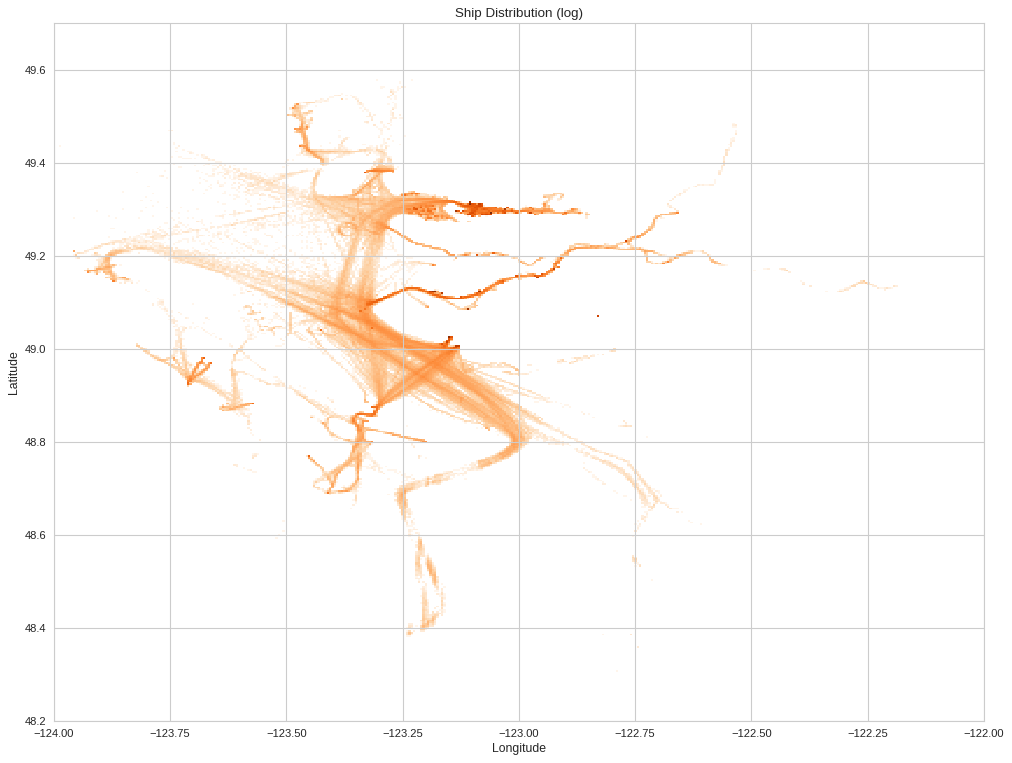

In [91]:
NUM = 400

x = delta_cur.Longitude
y = delta_cur.Latitude

xedges = np.linspace(-124,-122,num=NUM)
yedges = np.linspace(48.2,49.7,num=NUM)

H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))

H = H.T  # Let each row list bins with common y range.

fig = plt.figure(figsize=(15, 15), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, xlabel="Longitude", ylabel="Latitude", title="Ship Distribution (log)")
plt.imshow(H, interpolation='nearest', origin='low',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           cmap=matplotlib.cm.Oranges,
           norm=matplotlib.colors.LogNorm())

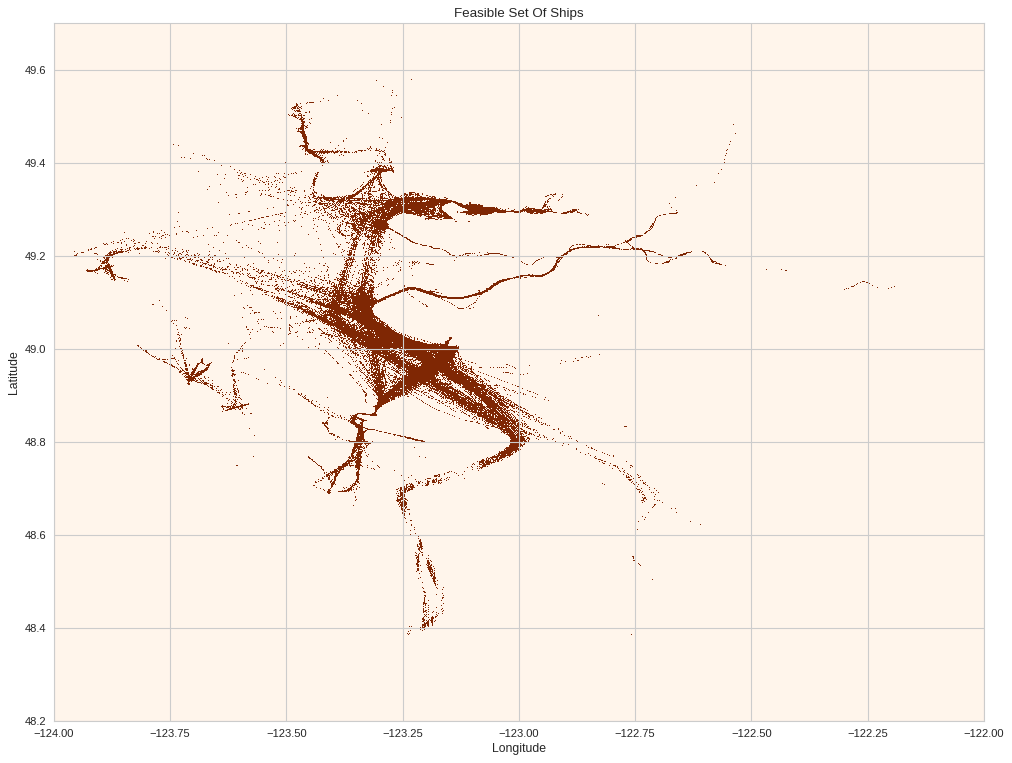

In [104]:
NUM = 2000

x = delta_cur.Longitude
y = delta_cur.Latitude

xedges = np.linspace(-124,-122,num=NUM)
yedges = np.linspace(48.2,49.7,num=NUM)

H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))

H = H.T  # Let each row list bins with common y range.

H[H>0] = 1
fig = plt.figure(figsize=(15, 15), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, xlabel="Longitude", ylabel="Latitude", title="Feasible Set Of Ships")
plt.imshow(H, interpolation='nearest', origin='low',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           cmap=matplotlib.cm.Oranges)